In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
log_interval = 100

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True, transform=torchvision.transforms.ToTensor()),
  batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True, transform=torchvision.transforms.ToTensor()), 
  batch_size=batch_size_test, shuffle=True)

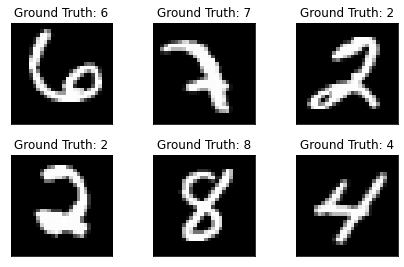

In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
image_dimensions = example_data[0][0].size()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()


In [5]:
input_dimension = image_dimensions[0]*image_dimensions[0]
ouput_dimension = 10

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(nn.Flatten(), nn.Linear(input_dimension, ouput_dimension), nn.ReLU())
    def forward(self, x):
        return self.net(x)

In [7]:
net = Net()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [8]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [9]:
def train(epoch):
    net.train()
    for batch_idx, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_hat = net(x)
        l = loss(y_hat, y)
        l.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), l.item()))
            train_losses.append(l.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [14]:
def test():
  net.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for x, y in test_loader:
      y_hat = net(x)
      test_loss +=  loss(y_hat, y).item()
      pred = y_hat.data.max(1, keepdim=True)[1]
      correct += pred.eq(y.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [15]:
for epoch in range(0, n_epochs):
  train(epoch)
  test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.593146
Train Epoch: 0 [640/60000 (1%)]	Loss: 0.490976
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.498985
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.495839
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.594118
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.509265
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.550295
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.508286
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.368351
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.520999
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.411161
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.567782
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.411049
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.738815
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.375406
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.557225
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.594630
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.396891
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.480423
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.514823
Train Epoch: 0 [12800/60000 (